# My Off Facebook Activity
## By: Victoria Smith

## 1. Overview
### 1.1 Purpose
This report analyzes data from my Facebook data.

### 1.2 Research Question
How do my interactions off of Facebook relate to my Facebook data?

### 1.3 Hypothesis
#### From my Off Facebook Activity, the apps with the most ads will be business related because of my business interests.

## 2. Data
The data used in this report comes from my Facebook profile, available for download through ["Settings & Privacy"](https://www.facebook.com/settings) settings. File "your_off-facebook_activity.json" was imported into a Python 3 environment.

Python Version:
3.9.1

The required packages used in this analysis:

In [181]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as ps
from scipy import stats
import random
import seaborn as sb

Data file loaded in:

In [182]:
with open (r'C:\Users\lemon\Documents\Data in Emerg\facebook-victorias00\ads_and_businesses\your_off-facebook_activity.json') as f:
    actv = json.load(f)

actv.keys()

dict_keys(['off_facebook_activity'])

## 3. The Data Structure
How the data looks and what parts of the data will be used.

Determines 'off_facebook_activity' is a list

In [183]:
type (actv['off_facebook_activity'])

list

In [184]:
actv ['off_facebook_activity'][0]

{'name': 'berkeleycollege.edu',
 'events': [{'id': 1635568120087946,
   'type': 'PAGE_VIEW',
   'timestamp': 1611725760},
  {'id': 2484655801548484, 'type': 'PAGE_VIEW', 'timestamp': 1611725760}]}

In [185]:
type (actv['off_facebook_activity'][0])

dict

Each app has a name and a list of events:

In [186]:
actv ['off_facebook_activity'][0].keys()

dict_keys(['name', 'events'])

Grabs the information from the 0th event's type

## 3. Data Prep
Creating a data frame using list comprehension.

In [189]:
apps_requests = [x['name'] for x in actv['off_facebook_activity']]
all_event_count = [len(x['events']) for x in actv['off_facebook_activity']]
activation_count = [len([x for x in j['events'] if x['type'] == 'ACTIVATE_APP']) for j in actv['off_facebook_activity']]
custom_count = [len([x for x in j['events'] if x['type'] == 'CUSTOM']) for j in actv['off_facebook_activity']]
search_count = [len([x for x in j['events'] if x['type'] == 'SEARCH']) for j in actv['off_facebook_activity']]
view_content_count = [len([x for x in j['events'] if x['type'] == 'VIEW_CONTENT']) for j in actv['off_facebook_activity']]
ad_request_count = [len([x for x in j['events'] if x['type'] == 'AD_REQUEST']) for j in actv['off_facebook_activity']]
page_view_count = [len([x for x in j['events'] if x['type'] == 'PAGE_VIEW']) for j in actv['off_facebook_activity']]

In [190]:
appbyevent = ps.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps_requests
appbyevent['Event Count'] = all_event_count
appbyevent['Activate App'] = activation_count
appbyevent['Custom'] = custom_count
appbyevent['Search'] = search_count
appbyevent['View Content'] = view_content_count
appbyevent['Ad Request'] = ad_request_count
appbyevent['Page Views'] = page_view_count
appbyevent.head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
0,berkeleycollege.edu,2,0,0,0,0,0,2
1,merriam-webster.com,2,0,0,0,0,0,2
2,usps.com,34,0,0,0,0,0,34
3,square.online,174,0,0,0,0,0,169
4,uberprints.com,89,0,0,8,0,0,31


## 4. Assessing Psychometric Properties
Does the data reflect my business interests?

Identifying top 5 apps containing the most events

In [191]:
appbyevent.sort_values('Event Count', ascending = False).head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
3,square.online,174,0,0,0,0,0,169
13,squareup.com,90,0,0,0,30,0,60
4,uberprints.com,89,0,0,8,0,0,31
2,usps.com,34,0,0,0,0,0,34
25,Candy Crush Saga,29,12,16,0,0,0,0


Due to my strong business interests, it can be assumed that these top five apps are related to my own business. Since square.online has the most Event Counts this may be the site I use for my business needs. Apps that have less than 28 Event Counts may not be the apps I use for my business needs (maybe recreational purposes). 

## 5. Univariate Distrubution
A pie chart of which apps have the most Event Counts using the same data from "4.Psychometric Properties".

Identifying apps that have 20 or more events and displaying a corresponding pie plot:

<ipython-input-192-fad4c6ae15a4>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  countstop, countsbot = sortEvents[mostEvents], sortEvents[-mostEvents]


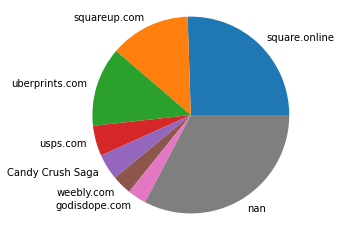

In [192]:
sortEvents=appbyevent.sort_values('Event Count', ascending = False)
vals = piedat ['Event Count']
labels = piedat ['App']

mostEvents = appbyevent['Event Count'] >= 20
countstop, countsbot = sortEvents[mostEvents], sortEvents[-mostEvents]
other = countsbot.sum()

piedat = countstop.append(ps.DataFrame(other['Event Count'],columns =['Event Count'],index = ['Event Count < 20']))

fig3, ax3 = plt.subplots()
ax3.pie (vals, labels = labels)
ax3.axis('equal')
plt.show()

## 5. Statistical Summary
Using a ttest to compare data distribution between Non-Business Related and Business Related apps.

Displaying apps with more than 4 Event Counts:

In [193]:
appbyevent.sort_values('Event Count', ascending = False)
subApps = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Ad Request', 'View Content', 'Page Views']].loc[appbyevent['Event Count'] >= 5]
subApps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views
2,usps.com,34,0,0,0,0,34
3,square.online,174,0,0,0,0,169
4,uberprints.com,89,0,0,0,0,31
5,Amazon,5,0,5,0,0,0
6,quizlet.com,12,0,0,0,12,0
11,weebly.com,22,0,2,0,0,19
13,squareup.com,90,0,0,0,30,60
15,chegg.com,9,0,0,0,6,3
19,godisdope.com,21,0,0,0,0,21
22,stockx.com,7,0,0,0,0,7


Creating a list out of this data:

In [194]:
subObv = np.array(subApps.drop(columns = ['App', 'Event Count']))
subObv

array([[  0,   0,   0,   0,  34],
       [  0,   0,   0,   0, 169],
       [  0,   0,   0,   0,  31],
       [  0,   5,   0,   0,   0],
       [  0,   0,   0,  12,   0],
       [  0,   2,   0,   0,  19],
       [  0,   0,   0,  30,  60],
       [  0,   0,   0,   6,   3],
       [  0,   0,   0,   0,  21],
       [  0,   0,   0,   0,   7],
       [ 12,  16,   0,   0,   0],
       [  0,   0,   0,   2,   3],
       [  0,   4,   0,   0,   2],
       [  0,   8,   0,   0,   0],
       [  0,   0,   0,   0,  10]], dtype=int64)

Clarifying which apps are business related and which apps are not business related:

In [195]:
bus_sites = ['business', 'business', 'business', 'non-business', 'non-business', 'business', 'business', 'non-business', 'business','non-business', 'non-business', 'business', 'non-business', 'non-business', 'non-business' ]

subApps['Business Related'] = bus_sites
subApps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views,Business Related
2,usps.com,34,0,0,0,0,34,business
3,square.online,174,0,0,0,0,169,business
4,uberprints.com,89,0,0,0,0,31,business
5,Amazon,5,0,5,0,0,0,non-business
6,quizlet.com,12,0,0,0,12,0,non-business
11,weebly.com,22,0,2,0,0,19,business
13,squareup.com,90,0,0,0,30,60,business
15,chegg.com,9,0,0,0,6,3,non-business
19,godisdope.com,21,0,0,0,0,21,business
22,stockx.com,7,0,0,0,0,7,non-business


Counting how many apps are business related and how many non-business related:

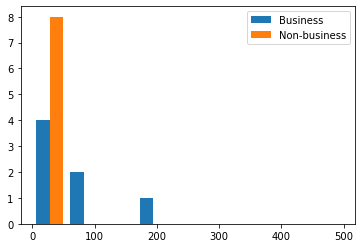

In [196]:
bins = np.linspace(0, 500, 10)
busApp = subApps['Event Count'].loc[subApps['Business Related'] == 'business']
nobusApp = subApps['Event Count'].loc[subApps['Business Related'] == 'non-business']
plt.hist([busApp, nobusApp], bins, label = ['Business', 'Non-business'])
plt.legend(loc = 'upper right')
plt.show()

Result => 7 business related apps, 8 Non-business related apps

In [197]:
ttest= stats.ttest_ind(subApps['Event Count'].loc[subApps['Business Related'] == 'business'], subApps['Event Count'].loc[subApps['Business Related'] == 'non-business'])
ttest.statistic

2.451850308979232

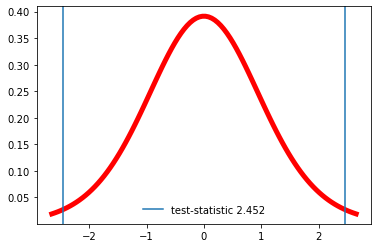

In [198]:
dF = (len(busApp) - 1) + (len(nobusApp) - 1)
#df2 = 100
fig, ax1 = plt.subplots(1,1)
x1 = np.linspace(stats.t.ppf(0.01, dF), stats.t.ppf(0.99, dF), 100)
ax1.plot(x1, stats.t.pdf(x1, dF), 'r-', lw = 5, label = '')
#x2 = np.linspace(stats.t.ppf(0.01, df2), stats.t.ppf(0.99, df2), 100)
#ax1.plot(x2, stats.t.pdf(x2, df2), 'k-', lw = 5, label = 't df = 100')
ax1.axvline(x=ttest.statistic, label = 'test-statistic 2.452')
ax1.axvline(x=-ttest.statistic, label = '_nolegend_')
ax1.legend(loc = 'best', frameon = False)
plt.show()

There is a 2.9 % chance that business and non-realted business apps match. 

In [199]:
ttest.pvalue

0.02911158189797494

## 6 Analysis
Visual to represent reserach question/hypothesis

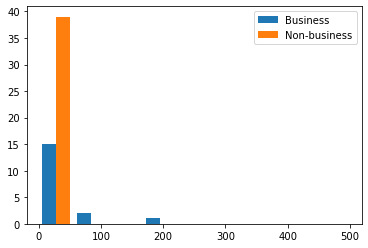

In [200]:
appbyevent.sort_values('Event Count', ascending = False)
allApps = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Ad Request', 'View Content', 'Page Views']].loc[appbyevent['Event Count'] >= 2]
allApps

busSites = ['non-business','non-business','business','business','business','non-business','non-business','business','business','business','non-business','business','non-business','business','non-business','non-business','business','non-business','non-business','business','business','non-business','non-business','non-business','non-business','non-business','non-business','non-business','non-business','non-business','non-business','business','non-business','non-business','non-business','non-business','non-business','non-business','non-business','non-business','non-business','business','business','non-business','non-business','non-business','non-business','non-business','business','business','non-business','non-business','non-business','non-business','business','business','non-business']

allApps['Business Related'] = busSites

bins = np.linspace(0, 500, 10)
busApp2 = allApps['Event Count'].loc[allApps['Business Related'] == 'business']
nobusApp2 = allApps['Event Count'].loc[allApps['Business Related'] == 'non-business']
plt.hist([busApp2, nobusApp2], bins, label = ['Business', 'Non-business'])
plt.legend(loc = 'upper right')
plt.show()

This final analysis of my Off Facebook Activity shows activities based on my interaction, with businesses and organizations. That data was organized in descending order based on how many events have occurred with those businesses/organizations. To approach the research question/hypothesis, all of the data was organized by business related or non-business-related apps, to determine if the event corresponds to my business interests. 

### 6.1 Limitations
Although there are more non-related businesses apps than business-related this could be due to:
1. Not all the apps I interacted with shared their data
2. Not all my electronic devices were not ‘tracked’ by Facebook or the business/organizations

It is important to note that the device this data was received from has not been identified.

### 6.2 Conclusion
Based on the data it has been proven that my Off Facebook Activity does not correspond to my business interests. The data showed that there are more non-business-related apps than business-related apps. Out of all the apps, there are approximately 40 non-business-related apps and only 18 business-related apps. This shows that my Off Facebook Activity is more related to my non-business-related interactions. This could mean that I spend more recreational time than business-focused time, but it is important to take the limitations mentioned in “6.1 Limitations”.